'\nfrom PIL import Image\nimg = Image.open("graph.png")\nimg.show()\n'

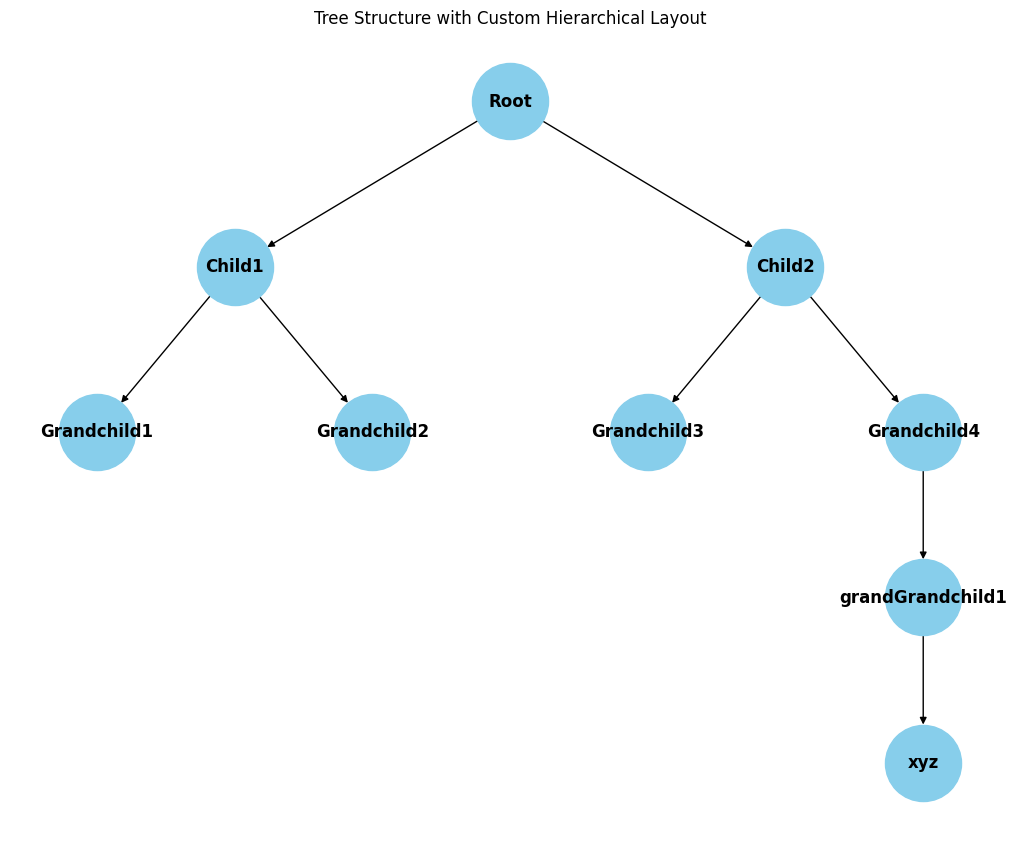

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
 
df=pd.read_csv(r"C:\Users\maygd\OneDrive - Deloitte (O365D)\Documents\PersonalRepos\RAG_Learning\graph_generator\EFX_dataset25.csv")
df=df[['EFX_NAME','EFX_LEGSUBNAMEALL','EFX_LEGDOMULTNAMEALL']]

 
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """
    If the graph is a tree, this will return the positions to plot this in a
    hierarchical layout.
    """
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos
 
def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width / 2 - dx / 2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    return pos
 
# Initialize a directed graph
G = nx.DiGraph()
 
# Add edges to form a tree structure
edges = [
    ('Root', 'Child1'),
    ('Root', 'Child2'),
    ('Child1', 'Grandchild1'),
    ('Child1', 'Grandchild2'),
    ('Child2', 'Grandchild3'),
    ('Child2', 'Grandchild4'),
    ('Grandchild4', 'grandGrandchild1'),
    ('grandGrandchild1', 'xyz')
]
'''edges=[]
for _, row in df.iterrows():
    edges.append(('Root',row['EFX_LEGDOMULTNAMEALL']))
    edges.append((row['EFX_LEGDOMULTNAMEALL'], row['EFX_LEGSUBNAMEALL']))'''
 
G.add_edges_from(edges)
 
# Define a hierarchical layout
pos = hierarchy_pos(G, root='Root')
 
# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_color='black', font_weight='bold', arrows=True)
plt.title('Tree Structure with Custom Hierarchical Layout')
plt.savefig("graph.png")
 
# Display the plot using an image viewer
'''
from PIL import Image
img = Image.open("graph.png")
img.show()
'''